In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\bjros\anaconda3\envs\pythondata\lib\site-packages (0.0)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
#Import Set Features Module
from sklearn.feature_selection import RFECV

# Set features. This will also be used as your x values.
selected_features = df.drop(['koi_disposition', 'koi_period_err1', 'koi_period_err2', 
                             'koi_srad_err1', 'dec', 'koi_impact_err1', 'koi_srad_err2', 'koi_impact', 'koi_srad', 
                             'koi_time0bk', 'koi_kepmag', 'koi_insol_err1', 'koi_prad_err1', 'koi_insol', 'koi_prad', 
                             'koi_prad_err2', 'koi_insol_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_impact_err2'], 
                            axis=1)
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk_err1,koi_time0bk_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_teq,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,ra
0,0,0,0,0,54.418383,0.003520,-0.003520,4.50700,0.11600,-0.11600,...,443,25.8,2,5455,81,-81,4.467,0.064,-0.096,291.93423
1,0,1,0,0,19.899140,0.000581,-0.000581,1.78220,0.03410,-0.03410,...,638,76.3,1,5853,158,-176,4.544,0.044,-0.176,297.00482
2,0,1,0,0,1.736952,0.000115,-0.000115,2.40641,0.00537,-0.00537,...,1395,505.6,1,5805,157,-174,4.564,0.053,-0.168,285.53461
3,0,0,0,0,2.525592,0.001130,-0.001130,1.65450,0.04200,-0.04200,...,1406,40.9,1,6031,169,-211,4.438,0.070,-0.210,288.75488
4,0,0,0,0,4.134435,0.001900,-0.001900,3.14020,0.06730,-0.06730,...,1160,40.2,2,6046,189,-232,4.486,0.054,-0.229,296.28613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,0.015700,-0.015700,4.80600,0.63400,-0.63400,...,929,8.4,1,5638,169,-152,4.296,0.231,-0.189,298.74921
6987,0,1,1,0,0.527699,0.000170,-0.000170,3.22210,0.01740,-0.01740,...,2088,453.3,1,5638,139,-166,4.529,0.035,-0.196,297.18875
6988,0,0,0,0,1.739849,0.007690,-0.007690,3.11400,0.22900,-0.22900,...,1608,10.6,1,6119,165,-220,4.444,0.056,-0.224,286.50937
6989,0,0,1,0,0.681402,0.002850,-0.002850,0.86500,0.16200,-0.16200,...,2218,12.3,1,6173,193,-236,4.447,0.056,-0.224,294.16489


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
koi_disposition = df['koi_disposition']
koi_disposition

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [7]:
#Find the Shape of the Inputs & Outputs

koi_disposition = koi_disposition.values.reshape(-1,1)
print(f"Selected Features Shape: {selected_features.shape}")
print(f"koi_disposition Shape: {koi_disposition.shape}")

Selected Features Shape: (6991, 21)
koi_disposition Shape: (6991, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, koi_disposition, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk_err1,koi_time0bk_err2,koi_duration,koi_duration_err1,koi_duration_err2,...,koi_teq,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,ra
6122,0,0,0,0,6.768901,0.008440,-0.008440,3.61600,0.3060,-0.3060,...,1017,10.8,1,5737,154,-171,4.327,0.153,-0.187,294.40472
6370,0,1,0,1,0.733726,0.007950,-0.007950,2.30900,0.2820,-0.2820,...,1867,13.8,1,5855,158,-175,4.578,0.033,-0.187,284.50391
2879,1,0,0,0,7.652707,0.006190,-0.006190,79.89690,0.0000,0.0000,...,989,254.3,1,6328,151,-189,4.481,0.050,-0.200,295.50211
107,0,0,0,0,7.953547,0.001820,-0.001820,2.63120,0.0595,-0.0595,...,696,38.4,1,4768,76,-85,4.536,0.056,-0.016,291.15878
29,0,0,0,0,4.959319,0.000083,-0.000083,2.22739,0.0075,-0.0075,...,1103,696.5,1,5712,77,-77,4.359,0.110,-0.110,292.16705


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
from tensorflow import keras

In [11]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

#Use MinMaxScaler to Scale Data Points to Range (0,1) and Transform to Center and Scale the Data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(f"X_train_scaled: {X_train_scaled}")
print(f"X_test_scaled: {X_test_scaled}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

#Use One Hot Encoding to Convert the KOI Disposition Values to Integers
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
print(f"encoded_y_train: {y_train}")
print(f"encoded_y_test: {y_test}")
print(f"encoded_y_train shape: {y_train.shape}")
print(f"encoded_y_test shape: {y_test.shape}")
#Convert the Encoded Values into One Hot Values
one_hot_y_train = to_categorical(encoded_y_train)
one_hot_y_test = to_categorical(encoded_y_test)
print(f"one_hot_y_train: {one_hot_y_train}")
print(f"one_hot_y_test: {one_hot_y_test}")
print(f"one_hot_y_train shape: {one_hot_y_train.shape}")
print(f"one_hot_y_test shape: {one_hot_y_test.shape}")

X_train_scaled: [[-0.43647294 -0.57184423 -0.50785575 ...  0.2464628  -0.57772899
   0.49936552]
 [-0.43647294  1.74872798 -0.50785575 ... -0.66288394 -0.57772899
  -1.57636903]
 [ 2.29109277 -0.57184423 -0.50785575 ... -0.53405982 -0.73914035
   0.72943663]
 ...
 [-0.43647294  1.74872798 -0.50785575 ...  1.13307587 -0.49081519
   1.0815803 ]
 [ 2.29109277 -0.57184423 -0.50785575 ...  1.30736732  0.52731799
   1.01466325]
 [-0.43647294 -0.57184423  1.96906305 ... -0.36734625 -0.34182009
   0.56843989]]
X_test_scaled: [[ 2.29109277 -0.57184423 -0.50785575 ... -0.45828092  0.87497322
   0.74498869]
 [-0.43647294 -0.57184423 -0.50785575 ... -0.73108494  0.29140908
   1.18276093]
 [-0.43647294 -0.57184423  1.96906305 ... -0.5492156   0.77564316
  -0.14131938]
 ...
 [-0.43647294 -0.57184423 -0.50785575 ... -0.33703469  0.58939928
   0.64564042]
 [-0.43647294 -0.57184423 -0.50785575 ...  0.6026236  -0.49081519
   0.53147807]
 [-0.43647294 -0.57184423 -0.50785575 ... -0.22336635  1.25987723
 

C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 1, Train/Test Score: 1.000/0.819


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 3, Train/Test Score: 0.908/0.834


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 5, Train/Test Score: 0.889/0.840


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 7, Train/Test Score: 0.878/0.838


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 9, Train/Test Score: 0.874/0.840


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 11, Train/Test Score: 0.870/0.835


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 13, Train/Test Score: 0.870/0.846


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 15, Train/Test Score: 0.866/0.849


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 17, Train/Test Score: 0.861/0.852


C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


k: 19, Train/Test Score: 0.862/0.848


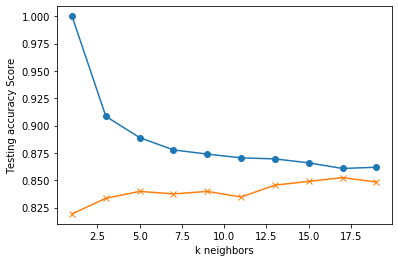

In [12]:
#Create a KNeighborsClassifier Model
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from numpy import ravel

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train.ravel())
    test_score = knn.score(X_test_scaled, y_test.ravel())
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
# Note that k: 17 seems to be the best choice for this dataset
model1 = KNeighborsClassifier(n_neighbors=17)
model1.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


k=17 Test Acc: 0.848


# Train the Model



In [14]:
#Train the Model
#Epochs=1000 chosen to Allow Enough Iterations to Minimize Losss and Improve Accuracy
#shuffle=True chosen to shuffle the Training Data
#verbose=2, because it is desired to see how the Loss and Accuracy Change Across Epochs
model1.fit(X_train_scaled, one_hot_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [15]:
#Evaluate the Model Using the Testing Data
print(f"Train Score: {model1.score(X_train_scaled, one_hot_y_train)}")
print(f"Test Score: {model1.score(X_test_scaled, one_hot_y_test)}")
#print(f"Model Loss: {model_loss}")
#print(f"Model Accuracy: {model_accuracy}")

Train Score: 0.8569521266450505
Test Score: 0.847254004576659


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
# Create the GridSearchCV model along with a parameter object containing the values to adjust
#Learned that GridSearchCV has parameters specific to whatever model it gets passed.
#Found at https://stackoverflow.com/questions/38758925/pass-a-scoring-function-from-sklearn-metrics-to-gridsearchcv
#Best n_neighbors estimated at 17, so Adjacent Numbers were chosen for Evaluation
#Weights Passed to See Whether it's best for Points to be Evaluated Equally or in Inverse Proportion to their Distance
#Parameter Info Found at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.model_selection import GridSearchCV

model1 = KNeighborsClassifier(n_neighbors=17)
param_grid = {'n_neighbors':[16, 17, 18],
              'weights':['uniform', 'distance'],
             'p':[1, 2, 3]}
grid1 = GridSearchCV(model1, param_grid, verbose=3)

In [18]:
# Train the model with GridSearch
# This will take the SVC model and try each combination of parameters
grid1.fit(X_train_scaled, one_hot_y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] n_neighbors=16, p=1, weights=uniform ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_neighbors=16, p=1, weights=uniform, score=0.825, total=   0.3s
[CV] n_neighbors=16, p=1, weights=uniform ............................
[CV]  n_neighbors=16, p=1, weights=uniform, score=0.804, total=   0.2s
[CV] n_neighbors=16, p=1, weights=uniform ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  n_neighbors=16, p=1, weights=uniform, score=0.829, total=   0.2s
[CV] n_neighbors=16, p=1, weights=uniform ............................
[CV]  n_neighbors=16, p=1, weights=uniform, score=0.818, total=   0.2s
[CV] n_neighbors=16, p=1, weights=uniform ............................
[CV]  n_neighbors=16, p=1, weights=uniform, score=0.810, total=   0.2s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[CV]  n_neighbors=16, p=1, weights=distance, score=0.847, total=   0.1s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[CV]  n_neighbors=16, p=1, weights=distance, score=0.826, total=   0.1s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[CV]  n_neighbors=16, p=1, weights=distance, score=0.855, total=   0.1s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[CV]  n_neighbors=16, p=1, weights=distance, score=0.843, total=   0.1s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[C

[CV]  n_neighbors=18, p=1, weights=uniform, score=0.803, total=   0.2s
[CV] n_neighbors=18, p=1, weights=uniform ............................
[CV]  n_neighbors=18, p=1, weights=uniform, score=0.832, total=   0.2s
[CV] n_neighbors=18, p=1, weights=uniform ............................
[CV]  n_neighbors=18, p=1, weights=uniform, score=0.811, total=   0.2s
[CV] n_neighbors=18, p=1, weights=uniform ............................
[CV]  n_neighbors=18, p=1, weights=uniform, score=0.812, total=   0.2s
[CV] n_neighbors=18, p=1, weights=distance ...........................
[CV]  n_neighbors=18, p=1, weights=distance, score=0.847, total=   0.1s
[CV] n_neighbors=18, p=1, weights=distance ...........................
[CV]  n_neighbors=18, p=1, weights=distance, score=0.825, total=   0.1s
[CV] n_neighbors=18, p=1, weights=distance ...........................
[CV]  n_neighbors=18, p=1, weights=distance, score=0.857, total=   0.1s
[CV] n_neighbors=18, p=1, weights=distance ...........................
[CV

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   43.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=17, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [16, 17, 18], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [19]:
model1.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [20]:
print(grid1.best_params_)
print(grid1.best_score_)

{'n_neighbors': 16, 'p': 1, 'weights': 'distance'}
0.8411205874005778


In [21]:
# Make predictions with the hypertuned model
predictions = grid1.predict(X_test_scaled)

In [22]:
# Calculate classification report
#Accuracy = (True Positives + True Negatives)/(All Observations)
#Precision = (True Positives)/(True Positives + False Positives)
#Recall = (True Positives)/(True Positives + False Negatives)
#F1 Score = 2 * (Precision * Recall)/(Precision + Recall)
from sklearn.metrics import classification_report
print(classification_report(one_hot_y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.77      0.62      0.69       411
FALSE POSITIVE       0.73      0.84      0.78       484
     CANDIDATE       0.98      0.95      0.96       853

     micro avg       0.86      0.84      0.85      1748
     macro avg       0.82      0.80      0.81      1748
  weighted avg       0.86      0.84      0.85      1748
   samples avg       0.84      0.84      0.84      1748



C:\Users\bjros\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Run F Classification (Compute ANOVA F-Value for the Provided Features and Only Consider the Most Important Features)
#ANOVA is a ratio of the Variation Between Samples and the Sum of Variation within Each Sample
#Method Found at https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
import sklearn

ANOVA_results = sklearn.feature_selection.f_classif(X_train_scaled, encoded_y_train)
#print(f"The selected features are: {selected_features.columns.values}")
#print(f"The F-values are: {ANOVA_results[0]}")
#print(f"The p-values are: {ANOVA_results[1]}")
F_classification_DF = pd.DataFrame({'Selected Features': selected_features.columns.values, 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
F_classification_DF.sort_values('F-values', ascending=False)

,Selected Features,F-values,p-values
1,koi_fpflag_ss,1057.420634,0.000000e+00
2,koi_fpflag_co,865.908600,0.000000e+00
0,koi_fpflag_nt,558.543756,1.292749e-220
15,koi_steff_err1,533.036760,1.902453e-211
3,koi_fpflag_ec,429.776495,1.469566e-173
16,koi_steff_err2,429.268196,2.274301e-173
10,koi_depth,210.190929,1.556533e-88
11,koi_teq,207.358855,2.144554e-87
19,koi_slogg_err2,185.617922,1.302093e-78
12,koi_model_snr,179.986327,2.517083e-76


# Save the Model

In [24]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'ben_roseburrough_model1.sav'
joblib.dump(model1, filename)

['ben_roseburrough_model1.sav']